<a href="https://colab.research.google.com/github/mohsen990/Stock-Price-Prediction---yfinance/blob/main/Stock_Price_Prediction_Study_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning - Project**


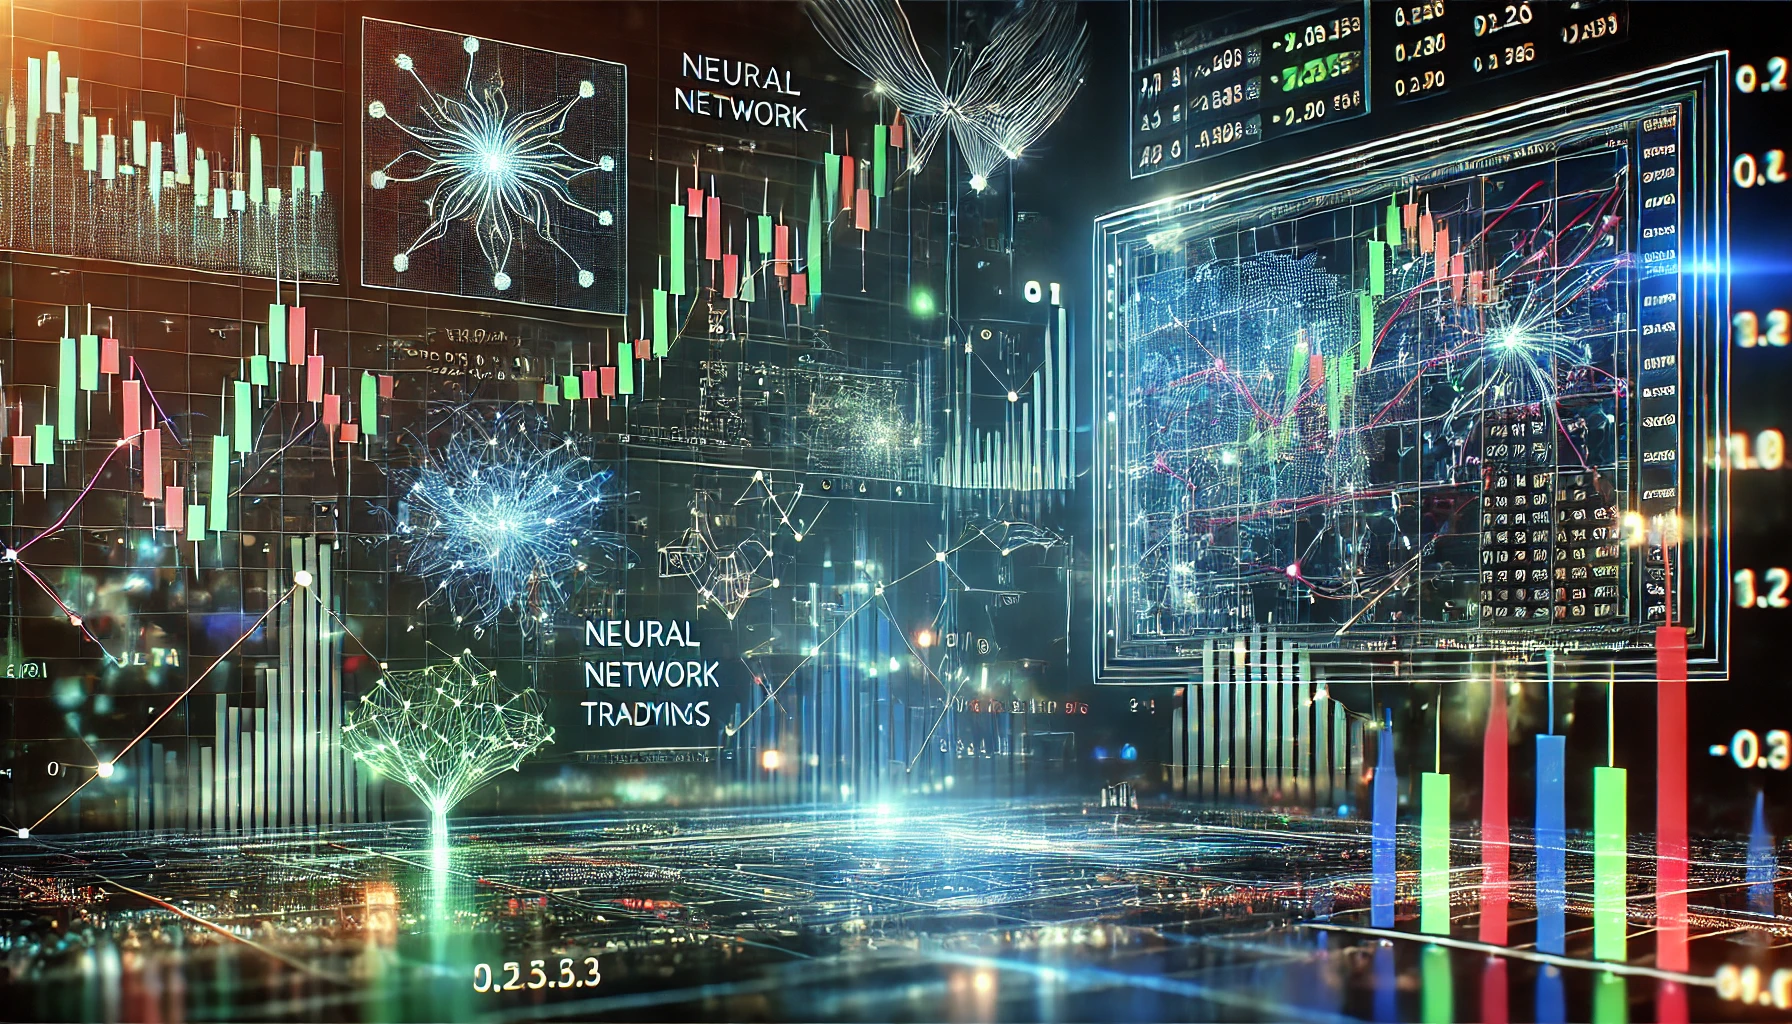

# **Introduction to the Stock Price Prediction Project**

Stock price prediction is a crucial aspect of financial analysis, helping investors and traders make informed decisions. This project explores different machine learning and deep learning approaches to forecast the closing prices of major tech stocks (e.g., Apple, Google, Microsoft, Amazon) using historical stock data from Yahoo Finance.

**The project employs two deep learning models for prediction:**

**1- Long Short-Term Memory (LSTM)**
 - A recurrent neural network (RNN) specialized for time-series forecasting, capable of capturing long-term dependencies in stock price movements.

**2- Convolutional Neural Network (CNN)**
- A deep learning model typically used for images, but in this case, adapted for pattern recognition in stock trends.

**Key Objectives:**

- ✔ **`Data Collection:`** Fetch historical stock prices using Yahoo Finance.

- ✔ **`Data Preprocessing:`** Normalize data and create sequences for model training.

- ✔ **`Model Comparison:`** Train and evaluate LSTM and CNN models to identify the better-performing approach.

- ✔ **`Performance Metrics:`** Compare models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and visual analysis.

- ✔ **`Improvement Strategies:`** Apply advanced techniques (e.g., hybrid models, hyperparameter tuning) to enhance accuracy.

In [ ]:
# install  Yahoo Finance library
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46729 sha256=1dbecb2d5222d381003ce29c98a058e87edb7c6a0669458f072c17311cf55da0
  Stored in directory: /root/.cache/pip/wheels/bc/d8/9d/52ad6058db295741fe0b776c0fcfdb6670036acab59ce4ccfd
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32876 sha256=6c91f09b6ce2ea8a350a6bd337add264284f1bc078b0a5d97e25cf93de985475
  Stored in directory: /root/.cache/pip/wheels/66/b9/15/482258065bee884b0d43bdc24b424e2cc6bde530e8e1380657
Successfully built tools pytils


In [ ]:
#  Importing Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

**Displays detailed information about Microsoft Co. (e.g.,business, market cap, sector, revenue, etc.)**

In [ ]:
msft = yf.Ticker("MSFT")
print(msft)
display(msft.info)

yfinance.Ticker object <MSFT>


{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

# **Downloading Data for Multiple Stocks**
- It fetches stock data for Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN).

- The data is downloaded for a weekly interval from 2023-01-01 to 2024-12-31.

- data_dw contains open, high, low, close, volume, etc., while data extracts only the closing prices.

In [ ]:
import yfinance as yf

# Define the tickers and corresponding company names
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

data_dw = yf.download(tickers=stocks, start='2019-01-01', end='2024-12-31', interval='1wk', progress=False)
data = data_dw['Close']

display(data_dw)

YF.download() has changed argument auto_adjust default to True


Price            Close                                            High  \
Ticker            AAPL        AMZN        GOOG        MSFT        AAPL   
Date                                                                     
2019-01-01   35.284355   81.475502   53.228245   96.004044   37.889004   
2019-01-08   35.778111   80.860497   52.047489   95.994629   36.858609   
2019-01-15   37.404816   84.809998   54.716396  101.318779   37.657647   
2019-01-22   37.280785   81.894501   53.312443   98.844856   37.717278   
2019-01-29   40.846664   81.665497   56.437214   99.465675   40.944459   
...                ...         ...         ...         ...         ...   
2024-11-26  239.326859  210.710007  172.783981  430.117584  240.525538   
2024-12-03  246.479004  226.089996  176.899323  445.127441  246.968471   
2024-12-10  250.764282  232.929993  198.160004  450.686310  251.103920   
2024-12-17  254.989655  225.059998  195.990005  434.379028  255.369227   
2024-12-24  251.923019  221.300003  192.690002  423.979858  259.814352   

Price                                                  Low              \
Ticker            AMZN        GOOG        MSFT        AAPL        AMZN   
Date                                                                     
2019-01-01   81.727997   53.507743   97.142245   33.869930   73.046501   
2019-01-08   83.830498   54.033852   98.656699   35.425101   79.757500   
2019-01-15   85.809998   55.219190  101.497507   35.790030   81.300499   
2019-01-22   84.174004   54.504160  101.478708   36.183588   80.510002   
2019-01-29   86.820503   56.437214  100.067699   36.758420   79.536003   
...                ...         ...         ...         ...         ...   
2024-11-26  212.990005  173.403289  432.133531  233.073739  201.789993   
2024-12-03  230.080002  177.838245  447.432816  238.637619  209.649994   
2024-12-10  233.000000  200.639999  455.247172  245.070545  224.199997   
2024-12-17  232.729996  202.880005  454.378935  245.420174  218.729996   
2024-12-24  229.139999  198.160004  440.057636  250.474615  218.429993   

Price                                     Open                          \
Ticker            GOOG        MSFT        AAPL        AMZN        GOOG   
Date                                                                     
2019-01-01   50.521969   91.432422   36.944460   73.260002   50.646522   
2019-01-08   51.876355   95.251505   35.673161   83.234497   53.612864   
2019-01-15   52.179514   95.834714   35.842504   81.599998   52.320506   
2019-01-22   52.797790   98.449780   37.307022   84.050003   54.205235   
2019-01-29   52.604238   96.107510   37.268854   81.563499   53.441976   
...                ...         ...         ...         ...         ...   
2024-11-26  168.558779  416.963935  233.073739  201.899994  169.297946   
2024-12-03  172.314512  426.884023  239.546623  210.309998  172.923822   
2024-12-10  182.669998  440.716311  246.618846  226.089996  184.535004   
2024-12-17  186.369995  427.772280  249.805352  232.389999  198.529999   
2024-12-24  190.360001  421.055729  255.209415  226.940002  196.169998   

Price                      Volume                                   
Ticker            MSFT       AAPL       AMZN       GOOG       MSFT  
Date                                                                
2019-01-01   93.642985  966947200  642690000  148990000  157625100  
2019-01-08   96.925883  725470000  648600000  141714000  150614100  
2019-01-15   96.427336  491411200  451896000  119874000  127262100  
2019-01-22  100.415762  554774800  510310000  126904000  142112700  
2019-01-29   98.656705  830400800  755244000  157572000  203449600  
...                ...        ...        ...        ...        ...  
2024-11-26  418.750362  156103100  134150900   53215000   78270400  
2024-12-03  428.979827  204798600  213098200   83314100  103974600  
2024-12-10  443.500736  199748200  161110000  152311500  102281100  
2024-12-17  450.107501  357366900  235497400  139304700  1535

# **Data Cleaning**
 If there are missing values, you can fill or drop them.

In [ ]:
print(data.isnull().sum())  # Count missing values per column

# Fill missing values with the previous available value
data.fillna(method='ffill', inplace=True)

# Alternatively, drop rows with missing values
data.dropna(inplace=True)


print(data.duplicated().sum())  # Count duplicate rows

# Remove duplicates if any
data.drop_duplicates(inplace=True)

Ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
dtype: int64
0


<ipython-input-6-5e267c9d8a17>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-6-5e267c9d8a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)
<ipython-input-6-5e267c9d8a17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-6-5e267c9d8a17>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [ ]:
#Check for Outliers (Using Z-score)
from scipy import stats

z_scores = stats.zscore(data.select_dtypes(include=['number']))  # Only numerical columns
outliers = (abs(z_scores) > 3).sum()
print(outliers)  # Number of outliers per column

Ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
dtype: int64


# **Visualizing Weekly Closing Prices**
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

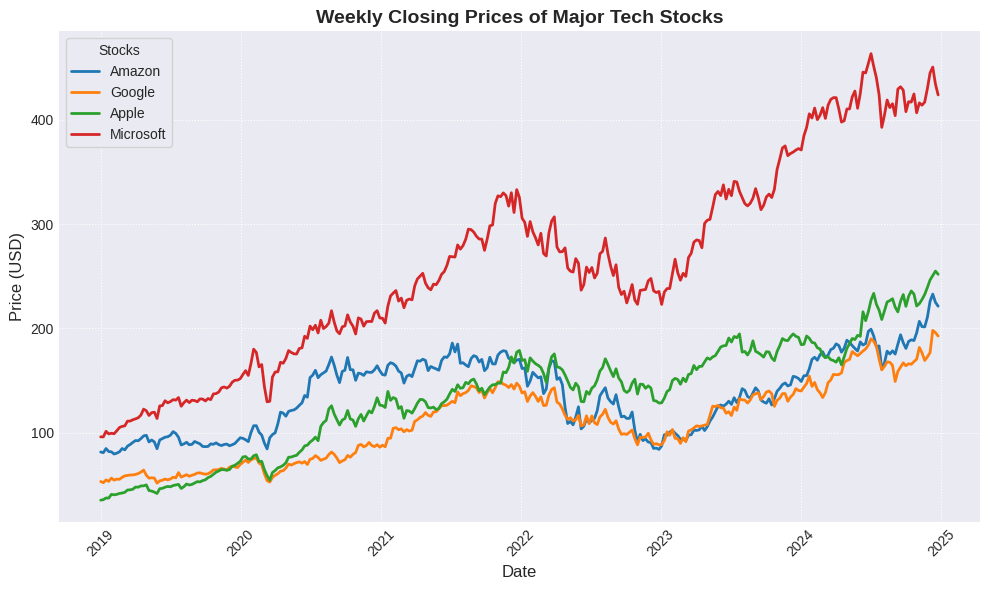

In [ ]:

import matplotlib.pyplot as plt

# Optional: pick a style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each stock
ax.plot(data.index, data['AMZN'], label='Amazon', linewidth=2)
ax.plot(data.index, data['GOOG'], label='Google', linewidth=2)
ax.plot(data.index, data['AAPL'], label='Apple', linewidth=2)
ax.plot(data.index, data['MSFT'], label='Microsoft', linewidth=2)

# Set x- and y-axis labels
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)

# Set a more descriptive title
ax.set_title('Weekly Closing Prices of Major Tech Stocks', fontsize=14, fontweight='bold')

# Customize the legend
ax.legend(frameon=True, loc='upper left', ncol=1, title='Stocks')

# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

# Optionally add a grid with subtle styling
ax.grid(True, linestyle=':', linewidth=0.8)

# Ensures everything fits nicely
plt.tight_layout()

plt.show()


# **Visualizing Trade Volume**
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

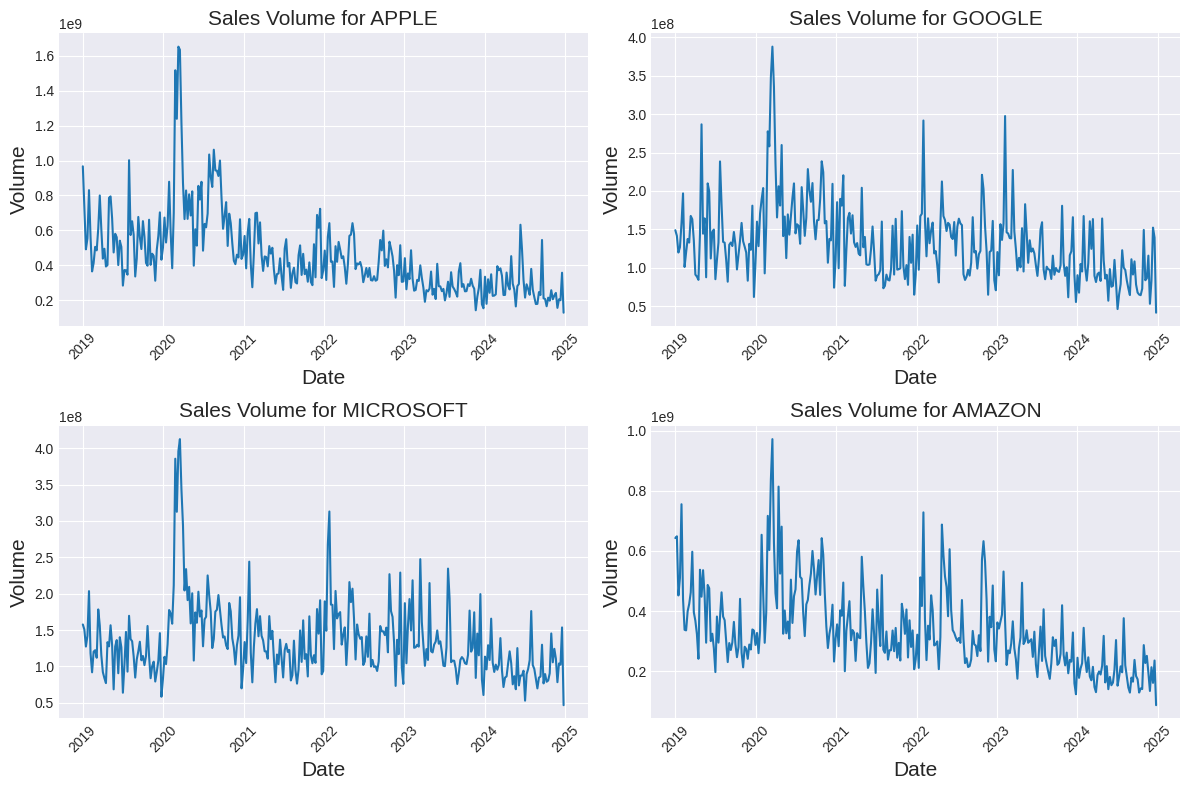

In [ ]:
# plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
i = 0
for stock, company in zip(stocks, company_names):
    i += 1
    plt.subplot(2, 2, i)
    plt.plot(data_dw.index, data_dw['Volume'][stock])  # Plot using Date on x-axis
    plt.ylabel('Volume', size=15)
    plt.xlabel("Date", size=15)
    plt.title(f"Sales Volume for {company}" , size=15)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()

# **Calculating and Plotting Moving Averages**

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
- It helps analyze stock price trends over different time windows.

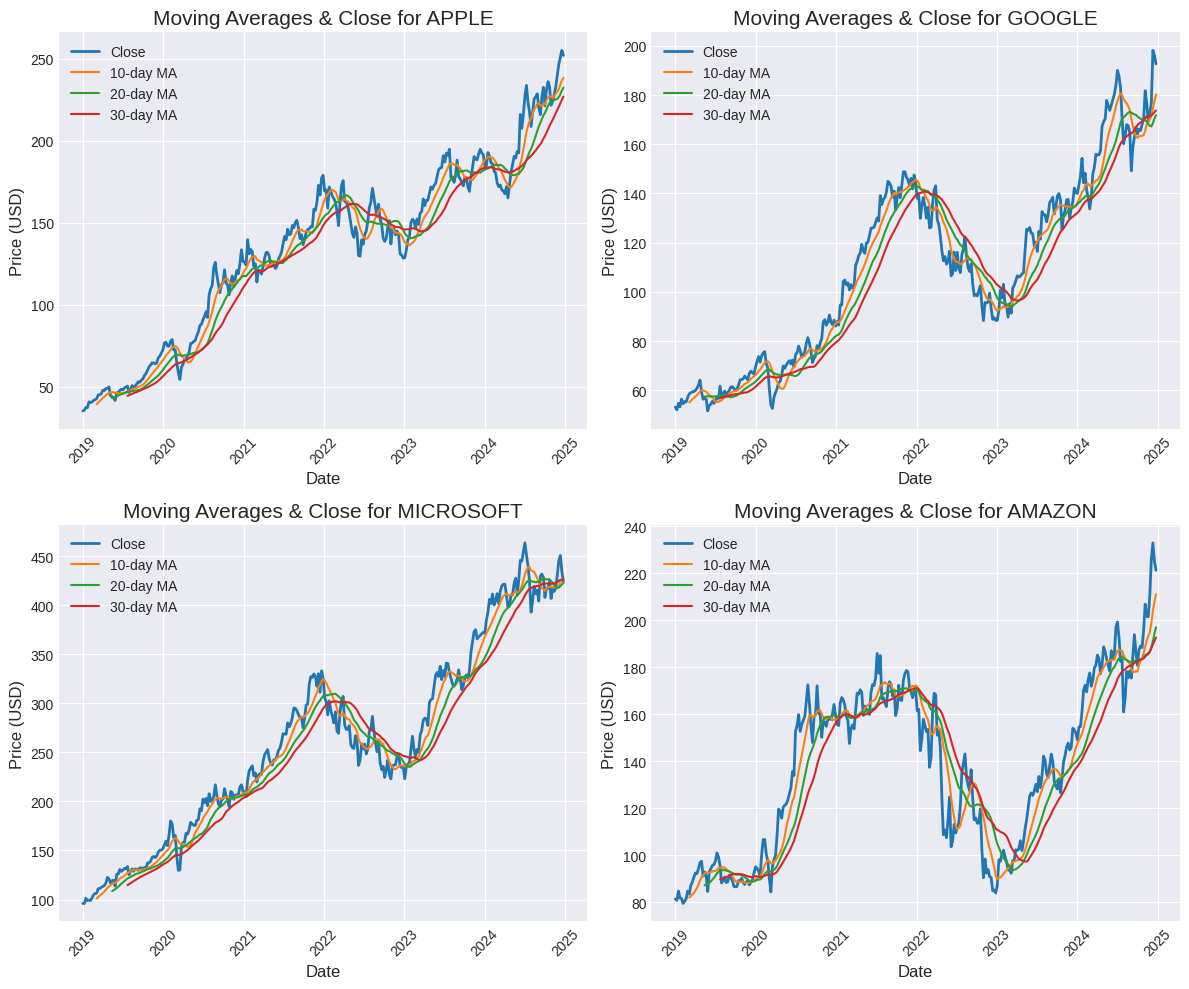

In [ ]:
# Define the tickers and corresponding company names
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Download weekly data
data_dw5 = yf.download(
    tickers=stocks,
    start='2019-01-01',
    end='2024-12-31',
    interval='1wk',
    progress=False
)
#plot the moving averages of 10, 20, and 30 days along with the Adjusted Close prices for each company
# Define the moving average window sizes
moving_averages = [10, 20, 30]

plt.figure(figsize=(12, 10))
# Create a figure with subplots for each company
for i, (stock, company) in enumerate(zip(stocks, company_names), start=1):
    plt.subplot(2, 2, i)

    # Extract just the closing prices for this stock
    # The following picks out the Series of weekly close for the current stock.
    company_close = data_dw5['Close'][stock]

    # Ensure the data is float (should already be, but just in case)
    company_close = pd.to_numeric(company_close, errors='coerce')

    # Plot the closing price
    plt.plot(company_close.index, company_close, label="Close", linewidth=2)

    # Calculate and plot moving averages
    for ma in moving_averages:
        ma_series = company_close.rolling(window=ma).mean()
        plt.plot(ma_series.index, ma_series, label=f"{ma}-day MA")

    # Customize the plot
    plt.title(f"Moving Averages & Close for {company}", fontsize=15)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Comparing Open vs Close Prices
Compares Open and Close prices for each stock using bar charts.

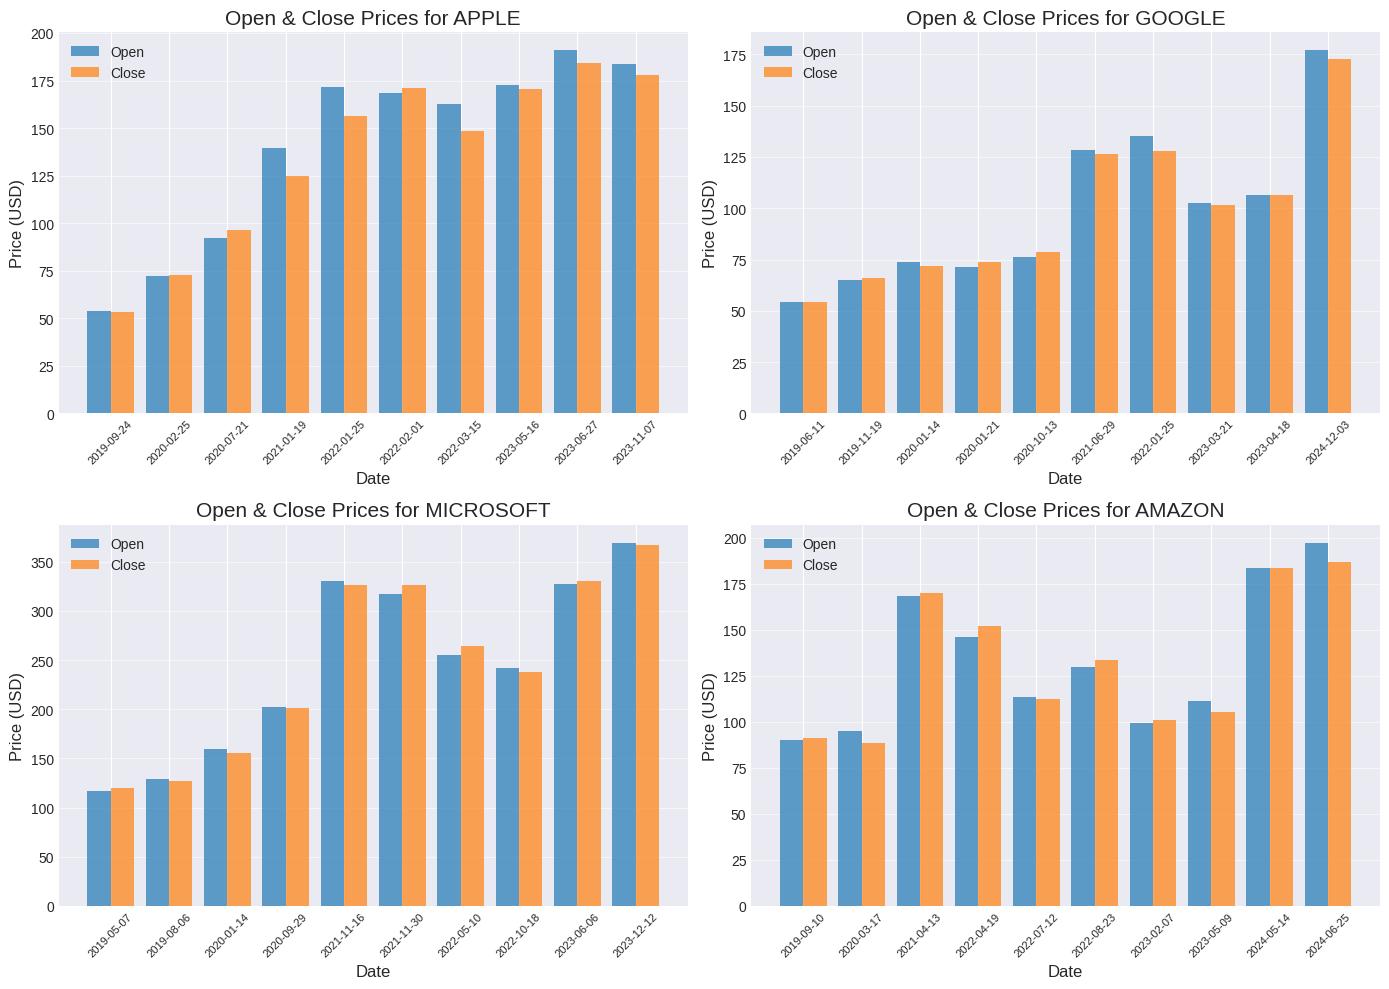

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

samples_per_company = 10  # how many rows you want to sample (optional)

plt.figure(figsize=(14, 10))

for i, (stock, company) in enumerate(zip(stocks, company_names), start=1):
    plt.subplot(2, 2, i)


    open_data = data_dw['Close'][stock].dropna()
    close_data = data_dw['Open'][stock].dropna()
    company_data = pd.DataFrame({'Open': open_data, 'Close': close_data})

    # 2) Convert columns to numeric
    company_data['Open'] = pd.to_numeric(company_data['Open'], errors='coerce')
    company_data['Close'] = pd.to_numeric(company_data['Close'], errors='coerce')

    # 3) (Optional) Sample rows if you only want to show a subset
    if len(company_data) > samples_per_company:
        # Random sample of `samples_per_company` rows
        company_data = company_data.sample(n=samples_per_company).sort_index()

    # 4) Create an integer x-array for the bars
    x = np.arange(len(company_data))
    width = 0.4

    # 5) Plot side-by-side bars for Open and Close
    plt.bar(x - width/2, company_data['Open'],  width, label="Open",  alpha=0.7)
    plt.bar(x + width/2, company_data['Close'], width, label="Close", alpha=0.7)

    # 6) Use the datetime index for the x-axis labels
    date_labels = company_data.index.strftime('%Y-%m-%d')
    plt.xticks(x, date_labels, rotation=45, fontsize=8)

    # 7) Customize the subplot
    plt.title(f"Open & Close Prices for {company}", size=15)
    plt.xlabel("Date", size=12)
    plt.ylabel("Price (USD)", size=12)
    plt.legend()
    plt.grid(axis="y", alpha=0.6)

plt.tight_layout()
plt.show()


# **Predict Stock Prices Using LSTM**
Below  could build an LSTM-based model (a type of RNN) to predict the Close price of Apple stock (AAPL) from weekly data. The workflow includes:

1- Data Collection (yfinance)

2- Feature Engineering (including a rolling variance feature)

3- Data Preparation (shaping into sequences for LSTM)

4- Model Construction (Keras LSTM)

5- Training and Evaluation


# *Imports and Data Collection*
df now contains a DateTimeIndex (weekly frequency) and a single column Close.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1) Download weekly Apple data
data_dw = yf.download(
    tickers='AAPL',
    start='2018-01-01',
    end='2024-12-31',
    interval='1wk',
    progress=False
)

# Focusing on the "Close" column
df = data_dw[['Close']].copy()
df.dropna(inplace=True)  # drop any missing values just in case
df.head()

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-01-01 to 2024-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None
(366, 1)


# Feature Engineering: Rolling Variance
We can create a rolling variance feature (or rolling standard deviation) based on the Close price. This will be an additional input to our LSTM:

*df['rolling_var'] calculates the variance of the previous window_size_for_var weekly closes.*

*Alternatively, you could use .std() (rolling standard deviation), or use multiple windows.*

In [ ]:
window_size_for_var = 3  # example: 3-week rolling variance
df['rolling_var'] = df['Close'].rolling(window=window_size_for_var).var()

# Drop initial rows that don't have rolling variance
df.dropna(inplace=True)
df.head()


Price,Close,rolling_var
Ticker,AAPL,
Date,,
2018-01-15,41.936794,0.167661
2018-01-22,40.303593,0.748396
2018-01-29,37.716320,4.528955
2018-02-05,36.755215,3.368115
2018-02-12,40.684994,4.196652


# Scale the Data
It’s common to scale features into [0, 1] or [-1, 1] for neural network stability:

In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)

# Convert back to a DataFrame
df_scaled = pd.DataFrame(
    scaled_values,
    columns=df.columns,
    index=df.index
)

df_scaled.head()


Price,Close,rolling_var
Ticker,AAPL,
Date,,
2018-01-15,0.029888,0.001205
2018-01-22,0.022462,0.005459
2018-01-29,0.010699,0.033154
2018-02-05,0.006329,0.024650
2018-02-12,0.024196,0.030719


# Create Sequences (X, y)
We need to choose a sequence length
lookback. For weekly data, let’s say we look back 4 weeks to predict the next week’s close:
*We store all columns (Close, rolling_var) in X so the model sees both signals.*
for time serise data past prices influence future prices. using sequence helps model to learn patterns effectively.
*We store only the next Close value in y.*

In [ ]:
sequence_length = 3

def create_sequences(df, seq_len):
    """
    data: a 2D numpy array, each column is a feature
          (Close, rolling_var, etc.)
    seq_len: how many past timesteps to include
    Returns: X, y
      where X.shape = (num_samples, seq_len, num_features)
            y.shape = (num_samples,)
    """
    X = []
    y = []
    for i in range(len(df) - seq_len):
        # Past seq_len rows as input
        X_seq = df[i : i + seq_len, :]
        # The next row's Close as the target
        # (Assuming 'Close' is the first column)
        y_val = df[i + seq_len, 0]

        X.append(X_seq)
        y.append(y_val)
    return np.array(X), np.array(y)

# Convert df_scaled to a numpy array
data_array = df_scaled.values

# Create sequences
X_all, y_all = create_sequences(data_array, sequence_length)

print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)


X_all shape: (361, 3, 2)
y_all shape: (361,)


# Train-Test Split
We’ll do a simple time-based split: use the first 80% for training, last 20% for testing:

In [ ]:
train_size = int(len(X_all) * 0.8)

X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (288, 3, 2) (288,)
Test size: (73, 3, 2) (73,)


# Build and Train the LSTM Model
We’ll use Keras (TensorFlow backend) for a simple LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True))  # First LSTM
model.add(LSTM(64, return_sequences=False))  # Second LSTM
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model = Sequential()
#model.add(LSTM(64, input_shape=(sequence_length, X_all.shape[2]), return_sequences=False))
#model.add(Dropout(0.2))  # optional, to reduce overfitting
#model.add(Dense(1))      # single output: next week's Close (scaled)
#
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()


# Train the Model

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.1335 - val_loss: 0.4321
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0846 - val_loss: 0.2518
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0399 - val_loss: 0.0546
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0206 - val_loss: 0.0033
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0258 - val_loss: 0.0256
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0132 - val_loss: 0.0609
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0131 - val_loss: 0.0410
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0094 - val_loss: 0.0045
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021 - val_l

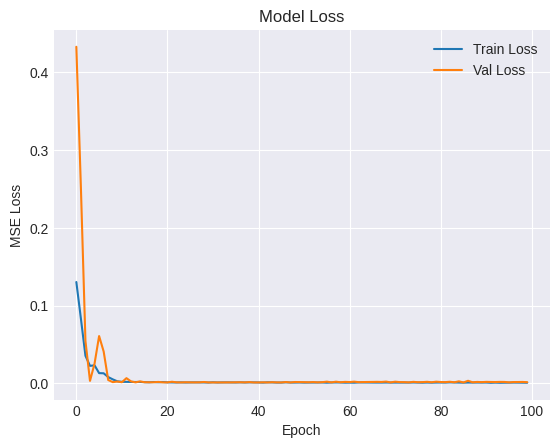

In [ ]:
epochs = 100
batch_size = 64

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Plot training vs. validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


# Evaluate the Model
*   Predictions

y_pred and y_true are now in the original price scale (not the scaled 0–1).



In [ ]:
y_pred_scaled = model.predict(X_test)

# Make an empty array for inverse transform
# shape => (len(y_pred_scaled), number_of_features)
pred_col_count = df_scaled.shape[1]  # = 2 if we have [Close, rolling_var]
temp_pred = np.zeros((len(y_pred_scaled), pred_col_count))
# Put our predictions in the first column
temp_pred[:, 0] = y_pred_scaled[:, 0]

# Now invert
temp_pred_inversed = scaler.inverse_transform(temp_pred)
y_pred = temp_pred_inversed[:, 0]  # the "Close" column after inverse

# Do the same for y_test
temp_test = np.zeros((len(y_test), pred_col_count))
temp_test[:, 0] = y_test
temp_test_inversed = scaler.inverse_transform(temp_test)
y_true = temp_test_inversed[:, 0]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


# Plot the Predictions vs. Actual
The x-axis is just the sequence of test samples in chronological order (not actual dates). You could keep track of the dates from df.index[train_size+sequence_length:] to make it more readable.

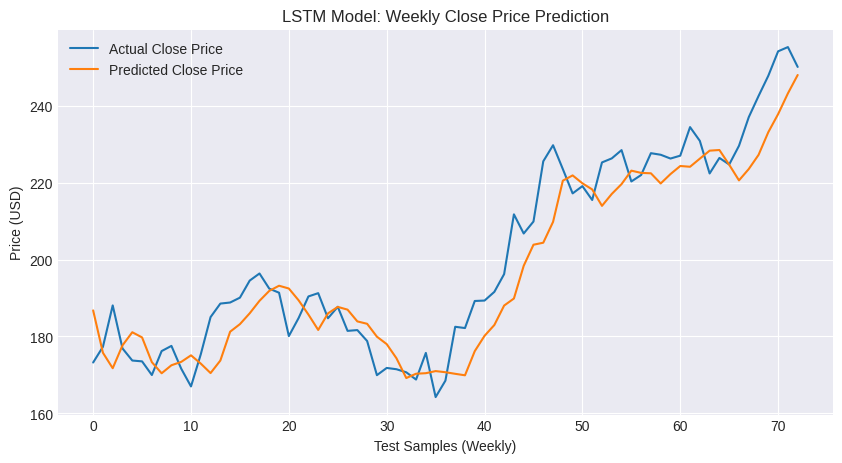

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title("LSTM Model: Weekly Close Price Prediction")
plt.xlabel("Test Samples (Weekly)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


# Compute Error Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print("R^2:", r2)

MSE : 79.51
RMSE: 8.92
MAE : 7.20
R^2: 0.8766465134352147


# Summery and Tips :
**Rolling Variance Feature:** We added a rolling_var column to give the model a sense of how volatile the previous weeks were. Additional features (e.g., volume, moving averages, etc.) can also help.

**Sequence Length (Lookback):** We used 4 weeks as an example. You can tune it to 8, 12, or more depending on data and performance.

**Hyperparameter Tuning:**
LSTM units, batch_size, epochs, and architecture (more layers, different dropout, etc.) should be tuned.

Consider a learning rate schedule or a different optimizer if the model converges poorly.

**Rolling Window:** The example used variance over a 3-week window. You may experiment with different windows (5, 10, etc.).

**Out-of-Sample Validation:** For a realistic evaluation, hold out more recent data for a final check.

This pipeline provides a basic demonstration of how to incorporate a rolling variance feature into an LSTM model (RNN) for weekly stock price prediction. Real-world predictive modeling would require additional considerations like more historical data, macroeconomic factors, regularization, and potentially advanced time-series models or ensemble methods.

# 1D Convolutional Neural Network (CNN)
 use a 1D Convolutional Neural Network (CNN) to predict the next week’s close price for google (APPle) using weekly data from yfinance. This approach treats the weekly time-series as a sequence, but leverages convolution

# Imports and Data Collection

In [ ]:
#
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Download Weekly GOOGLE Data

In [ ]:
# Download weekly data for AAPL
data_dw = yf.download(
    tickers='AAPL',
    start='2018-01-01',
    end='2024-12-31',
    interval='1wk',
    progress=False
)

# Focus on just the 'Close' column
df = data_dw[['Close']].copy()
df.dropna(inplace=True)
df.head()


Price,Close
Ticker,AAPL
Date,
2018-01-01,41.123711
2018-01-08,41.614841
2018-01-15,41.936794
2018-01-22,40.303593
2018-01-29,37.716320


# Prepare the Data for a 1D CNN

Select Features and Target

In [ ]:
df['Close_target'] = df['Close'].shift(-1)

# Drop the last row (no "next week's Close" for the final entry)
df.dropna(inplace=True)
df.head()

Price,Close,Close_target
Ticker,AAPL,
Date,,
2018-01-01,41.123711,41.614841
2018-01-08,41.614841,41.936794
2018-01-15,41.936794,40.303593
2018-01-22,40.303593,37.716320
2018-01-29,37.716320,36.755215


# Simple Feature Engineering
We’ll create a few rolling features to provide more context for the CNN:

3-week moving average (roll_mean_3)

6-week moving average (roll_mean_6)

3-week rolling standard deviation (roll_std_3)

In [ ]:
df['roll_mean_3'] = df['Close'].rolling(window=3).mean()
df['roll_mean_6'] = df['Close'].rolling(window=6).mean()
df['roll_std_3']  = df['Close'].rolling(window=3).std()

# Drop rows that don't have rolling values
df.dropna(inplace=True)

df.head()


Price,Close,Close_target,roll_mean_3,roll_mean_6,roll_std_3
Ticker,AAPL,,,,
Date,,,,,
2018-02-05,36.755215,40.684994,38.258376,39.908412,1.835242
2018-02-12,40.684994,41.409359,38.385509,39.835293,2.048573
2018-02-19,41.409359,41.576897,39.616522,39.801046,2.504294
2018-02-26,41.576897,42.466412,41.223750,39.741063,0.474037
2018-03-05,42.466412,42.003956,41.817556,40.101533,0.568135


In [ ]:
feature_cols = ['Close', 'roll_mean_3', 'roll_mean_6', 'roll_std_3']
X_all = df[feature_cols].values  # shape: (num_samples, num_features)
y_all = df['Close_target'].values

# Scale the Input Features
CNNs typically benefit from normalized features. We can use MinMaxScaler:

In [ ]:
scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)  # shape: (num_samples, num_features)


# Sequence Creation
A 1D CNN for time series usually expects a 3D input of shape:
where timesteps is how many consecutive weeks you want to feed into the model to predict the next week. Let’s choose a sequence_length of 4 weeks as an example.

In [ ]:
sequence_length = 3

def create_sequences(data_X, data_y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(data_X) - seq_len):
        X_seq.append(data_X[i : i + seq_len])
        y_seq.append(data_y[i + seq_len])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_all_scaled, y_all, sequence_length)

print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)


X_seq shape: (357, 3, 4)
y_seq shape: (357,)


# Train-Test Split
split chronologically (first 80% for training, last 20% for testing):

In [ ]:
train_size = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape,  y_test.shape)


Train shape: (285, 3, 4) (285,)
Test shape : (72, 3, 4) (72,)


# Build the 1D CNN Model in Keras
We’ll create a simple 1D CNN architecture:

1- Conv1D layer with filters=32, kernel_size=2

2- Dropout (optional) to reduce overfitting

3- Flatten the output of the convolution

4- Dense layers leading to a single output (predicted next week’s Close)

In [ ]:
model = Sequential()

# 1D Convolution layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu',
                 input_shape=(sequence_length, X_train.shape[2])))

# Optional dropout
model.add(Dropout(0.2))

# Flatten the final feature maps into a 1D vector
model.add(Flatten())

# Final dense layer for regression
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # single output -> next week's close price

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2, 32)               │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

# Train the CNN Model

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 13827.2412 - val_loss: 40713.8320
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13524.2461 - val_loss: 40517.8008
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13203.7939 - val_loss: 40307.2422
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13076.5205 - val_loss: 40072.4414
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13614.2637 - val_loss: 39796.6328
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12561.1123 - val_loss: 39465.3789
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13402.5957 - val_loss: 39055.1875
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13293.9238 - val_loss: 38556.9375
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12795.5732 - val_loss: 37966.2031
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12385.5547 - val_loss: 37250.6875
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11696.9473 - val_los

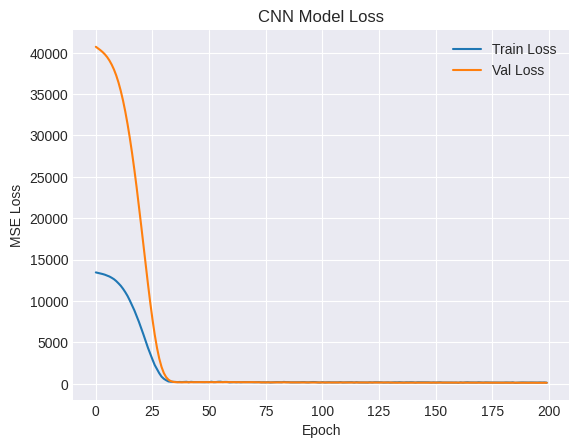

In [ ]:
epochs = 200
batch_size = 64

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Model Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


# Evaluate the Model
**Metrics**

In [ ]:
y_pred = model.predict(X_test).ravel()  # shape: (num_test_samples,)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R^2 : {r2:.2f}")


MSE : 109.56
RMSE: 10.47
MAE : 8.50
R^2 : 0.83


# Plot Actual vs. Predicted


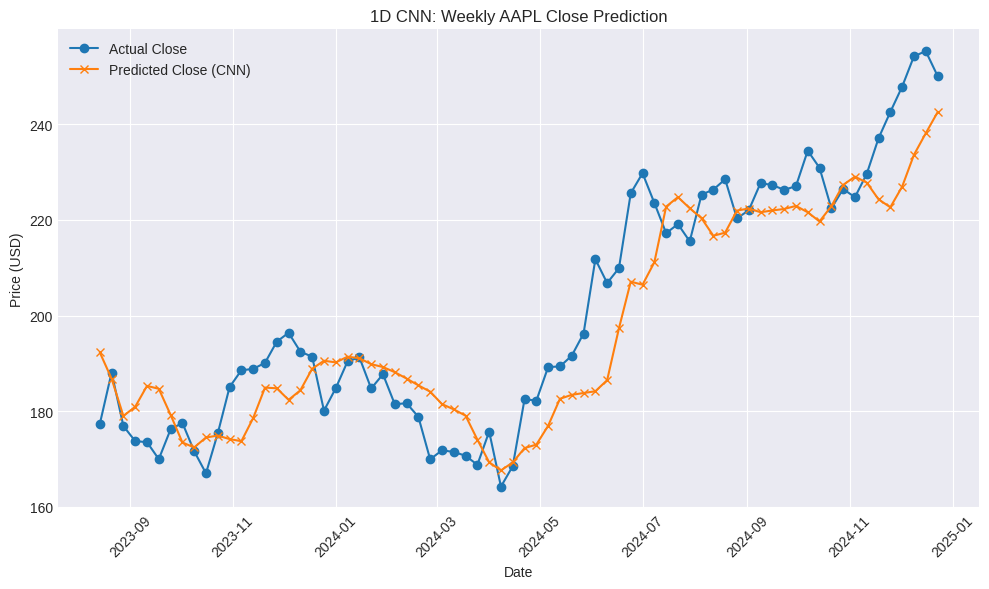

In [ ]:
# Reconstruct the appropriate date index for X_test
test_dates = df.index[sequence_length + train_size:]  # shift by sequence_length

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual Close', marker='o')
plt.plot(test_dates, y_pred, label='Predicted Close (CNN)', marker='x')
plt.title("1D CNN: Weekly AAPL Close Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Final Remarks

A 1D CNN can detect local patterns or “motifs” in a time series by applying convolutional filters across consecutive weeks (timesteps). While it is not the most conventional architecture for time-series forecasting (compared to LSTM/GRU or Transformers), CNNs often train faster and can still yield competitive results—provided you:

*   Have sufficiently large and varied data.
*   Perform robust feature engineering.
*   Use proper hyperparameter tuning and validation strategies.

Financial time-series data can be exceptionally noisy and regime-dependent. Even with a carefully engineered 1D CNN, short-term price predictions often remain challenging. Nonetheless, this template demonstrates how to implement and test a 1D CNN on yfinance data for weekly close-price forecasting.